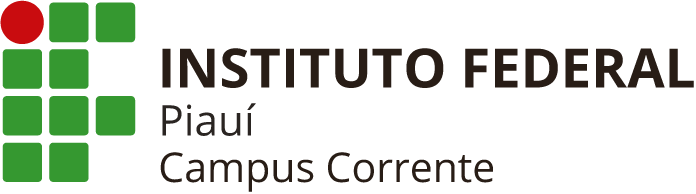


### PROJETO DE AM - PONTA A PONTA  ###
**Instituto Federal do Piauí - Campus Corrente**  
**Disciplina:** Inteligência Artificial  
**Professor:** Igor Bezerra Reis  
**Data:** 3 de abril de 2025


## Trabalhando com Dados Reais

À medida que você estuda sobre aprendizado de máquina, a melhor coisa é testar os dados do mundo real, e não conjuntos de dados artificiais. Felizmente, existem milhares de conjuntos *open data* (dados abertos) à sua escolha, que variam em todos os tipos de campos de atuação. Veja a seguir onde procurar e obter os dados:

- **Repositórios populares de open data**
  - [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
  - [Conjunto de dados no Kaggle](https://www.kaggle.com/datasets)
  - [Conjunto de Dados no AWS da Amazon](https://registry.opendata.aws/)

- **Metaportais de dados** (listam os repositórios open data)
  - [Data Portals](http://dataportals.org/)
  - [OpenDataMonitor](http://opendatamonitor.eu/)
  - [Quandl](http://quandl.com/)

- **Outras páginas que listam muitos repositórios populares de open data**
  - [Lista de conjuntos de dados de aprendizado de máquina do Wikipedia](https://homl.info/9)
  - [Quora.com](https://homl.info/10)
  - [Conjuntos de dados em subseção do Reddit](https://www.reddit.com/r/datasets)


## Conjunto de Dados: Housing Prices

Neste projeto, utilizaremos o conjunto de dados **[Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)**, disponível no Kaggle.

Este dataset contém informações detalhadas sobre imóveis, como:

- Número de quartos
- Tamanho em metros quadrados
- Número de banheiros
- Presença de garagem
- Localização
- Valor de venda

O objetivo principal será construir um modelo de **regressão supervisionada** capaz de prever o preço de uma casa com base em suas características. Esse tipo de problema é comum em aplicações de precificação automática, avaliação imobiliária e sistemas de recomendação no mercado imobiliário.


In [ ]:
import random
import numpy  as np

### Problema abordado
1. Aprendizado supervisioando de regressão multivariada
2. Aprendizado em batch já que pegarei os dados farei todo o processor de treinamento e colocarei para produção

### Erro quadratico medio

$RMSE(X,h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1}{h(x^{(i)} - y^{(i)})}}$

In [ ]:
def Mean_Squared_Error(pred,y,squared=True):
    rmse = (1/np.size(y))*np.sum(pred-y)
    if (squared):
        return np.sqrt(rmse)
    return rmse

### Erro Absoluto Medio
$MAE(X,h) = \frac{1}{m} \cdot \sum^{m}_{i=1} | h(x^{(i)} - y^{(i)})|$

In [ ]:
def Mean_Absolute_Error(pred,y):
    return (1/np.size(y))*abs(np.sum(pred-y))

### Problema

**Fazendo o download de forma automática**

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import warnings
import copy
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings('ignore',category=pd.errors.SettingWithCopyWarning)

In [ ]:
data = pd.read_csv(r'/content/datasets/housing/housing.csv',sep=',')

In [ ]:
data.head(3)

&nbsp;

## Analise dos dados

In [ ]:
data.info()

In [ ]:
data["ocean_proximity"].value_counts()

In [ ]:
data.isna().nunique()

In [ ]:
data.describe()

In [ ]:
fig , axis = plt.subplots(3,3,figsize=(20,10))
columns    = data.select_dtypes(exclude=['object']).columns
for ax, column in zip(axis.flatten(),columns):
    hist = sea.histplot(data[column],ax=ax,bins=50,kde=True)
    hist.lines[0].set_color('red')
plt.show()

## Pré-processamento

In [ ]:
dataset = data.copy()

In [ ]:
from sklearn.preprocessing import (
    StandardScaler
)
from sklearn.model_selection import (
    GridSearchCV        ,
    RandomizedSearchCV  ,
    train_test_split    ,
    StratifiedShuffleSplit
)

In [ ]:
train , test = train_test_split(dataset,test_size=0.2,random_state=42)

In [ ]:
dataset['income_cat'] = pd.cut(
    x      = data['median_income'],
    bins   = [0,1.5,3.0,4.5,6.,np.inf],
    labels = [1,2,3,4,5]
    )

In [ ]:
dataset['income_cat'].hist()
plt.show()

In [ ]:
splitStratifed = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for itrain , itest in splitStratifed.split(dataset,dataset['income_cat']):
    trainf = dataset.iloc[itrain]
    testf  = dataset.iloc[itest]

In [ ]:
trainf['income_cat'].value_counts().apply(lambda x: x/len(trainf))

In [ ]:
housing = trainf.copy()

In [ ]:
fig = plt.scatter(x =housing['latitude'] , y=housing['longitude'],alpha=0.4,s=housing['population']/100,c=housing['median_house_value'],cmap='jet')
plt.colorbar(fig)
plt.show()

**Deixando mais interessante**

In [ ]:
plt.figure(figsize=(10,5))
sea.heatmap(data.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

&nbsp;

### Preparando os dados

In [ ]:
housing        = trainf.drop(columns=['median_house_value'])
housing_labels = trainf['median_house_value']

imputando valores ausentes



```
# opção 1
housing.dropna(subset=["total_bedrooms"])   

# opção 2
housing.drop("total_bedrooms", axis=1)       

# opção 3
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
```



In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing['total_bedrooms'] = imputer.fit_transform(housing['total_bedrooms'].values.reshape(-1,1))

Manipulando texto e atributos categoricos

In [ ]:
housing[["ocean_proximity"]].head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal_Encoder = OrdinalEncoder()
Ordinal_Encoder.fit_transform(housing['ocean_proximity'].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

dummiesSk = OneHotEncoder()
array = dummiesSk.fit_transform(housing['ocean_proximity'].values.reshape(-1,1))
array.toarray()

In [ ]:
housing

**Padronizando os dados**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Lista das colunas numéricas e categóricas
num_atributos = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                 'total_bedrooms', 'population', 'households', 'median_income']
cat_atributos = ['ocean_proximity']

In [ ]:
# Pipeline numérico simples: imputação + padronização
numberPipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler' , StandardScaler())
])

# Combinando ambos os pipelines
fullPipeline = ColumnTransformer(transformers=[
    ('num', numberPipeline, num_atributos),
    ('cat', OneHotEncoder(), cat_atributos)
])

In [ ]:
housing.drop(columns=['income_cat'], errors='ignore', inplace=True)
prepared = fullPipeline.fit_transform(housing)

In [ ]:
prepared

### treinando

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(prepared,housing_labels)

**testando**

In [ ]:
xtest = housing.iloc[:,:9]
pred = reg.predict(fullPipeline.fit_transform(xtest))

In [ ]:
pred

calculando o RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

**calculando o MSE**

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, pred)
lin_mae

**Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(prepared,housing_labels)

In [ ]:
pred = tree.predict(fullPipeline.fit_transform(xtest))

In [ ]:
mean_absolute_error(housing_labels,pred)

In [ ]:
(mean_squared_error(housing_labels,pred))

&nbsp;